## Getting started

Start by importing and initializing `ACTIN`

In [54]:
from actin2 import actin2

actin = actin2.ACTIN()

Get the HARPS 1D fits files of the star HD41248 from the `test` folder

In [55]:
import glob, os
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/HARPS/HD41248", "*_s1d_A.fits"))
files

['../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T01:18:06.472_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T06:24:23.418_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T04:17:29.213_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T05:33:32.740_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T03:16:16.891_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T05:37:46.157_s1d_A.fits']

Check which indices come pre-installed

In [56]:
actin.IndTable().table

,ind_id,ind_var,ln_id,ln_c,ln_ctr,ln_win,bandtype
0,I_CaII,L1,CaIIK,1.0,3933.664,1.09,tri
1,I_CaII,L2,CaIIH,1.0,3968.470,1.09,tri
2,I_CaII,R1,CaIIR1,1.0,3901.070,20.00,sq
3,I_CaII,R2,CaIIR2,1.0,4001.070,20.00,sq
4,I_NaI,L1,NaID1,1.0,5895.920,0.50,sq
5,I_NaI,L2,NaID2,1.0,5889.950,0.50,sq
6,I_NaI,R1,NaIR1,1.0,5805.000,10.00,sq
7,I_NaI,R2,NaIR2,1.0,6097.000,20.00,sq
8,I_Ha16,L1,Ha16,1.0,6562.808,1.60,sq
9,I_Ha16,R1,HaR1,1.0,6550.870,10.75,sq


We are going to calculate the indices based on the CaII H&K, Halpha (using 0.6 ang central band) and NaI D2 lines by using the respective index ID as in `ìnd_id`:

In [57]:
indices = ['I_CaII', 'I_Ha06', 'I_NaI']

Now calculate the indices for the loaded files. The results will be stored in a pandas DataFrame.

In [65]:
df = actin.run(files, indices)

Se the results headers

In [61]:
df.keys()

Index(['obj', 'instr', 'date_obs', 'bjd', 'snr_med', 'ftype', 'rv', 'rv_err',
       'berv', 'ccf_noise', 'fwhm', 'cont', 'noise', 'spec_flg', 'file',
       'I_CaII', 'I_CaII_err', 'I_CaII_mrneg', 'I_Ha06', 'I_Ha06_err',
       'I_Ha06_mrneg', 'I_NaI', 'I_NaI_err', 'I_NaI_mrneg', 'actin_ver'],
      dtype='object')

and the full table

In [59]:
df

,obj,instr,date_obs,bjd,snr_med,ftype,rv,rv_err,berv,ccf_noise,...,I_CaII,I_CaII_err,I_CaII_mrneg,I_Ha06,I_Ha06_err,I_Ha06_mrneg,I_NaI,I_NaI_err,I_NaI_mrneg,actin_ver
0,HD41248,HARPS,2014-01-16T05:37:46.156,2.456674e+06,44.65,s1d,3527.490001,1.347834,-2470.193861,2.032679,...,0.126961,0.001451,0.0,0.107768,0.000661,0.0,0.358034,0.001259,0.0,2.0.0
1,HD41248,HARPS,2014-01-16T06:24:23.418,2.456674e+06,45.05,s1d,3526.934415,1.344395,-2504.977966,2.022905,...,0.138299,0.001461,0.0,0.105850,0.000663,0.0,0.356336,0.001262,0.0,2.0.0
2,HD41248,HARPS,2014-01-21T03:16:16.890,2.456679e+06,84.55,s1d,3525.688453,0.729949,-2776.259431,1.025167,...,0.145478,0.000734,0.0,0.105248,0.000376,0.0,0.358023,0.000710,0.0,2.0.0
3,HD41248,HARPS,2014-01-21T05:33:32.739,2.456679e+06,81.10,s1d,3530.066278,0.757785,-2902.816742,1.078529,...,0.141641,0.000777,0.0,0.105052,0.000388,0.0,0.357874,0.000734,0.0,2.0.0
4,HD41248,HARPS,2014-01-24T01:18:06.471,2.456682e+06,55.00,s1d,3525.381739,1.072841,-2906.505374,1.616187,...,0.139616,0.001181,0.0,0.106157,0.000547,0.0,0.356969,0.001042,0.0,2.0.0
5,HD41248,HARPS,2014-01-24T04:17:29.213,2.456682e+06,56.20,s1d,3525.766877,1.056758,-3088.383563,1.584311,...,0.137772,0.001124,0.0,0.107016,0.000557,0.0,0.357166,0.001044,0.0,2.0.0


and plot the results

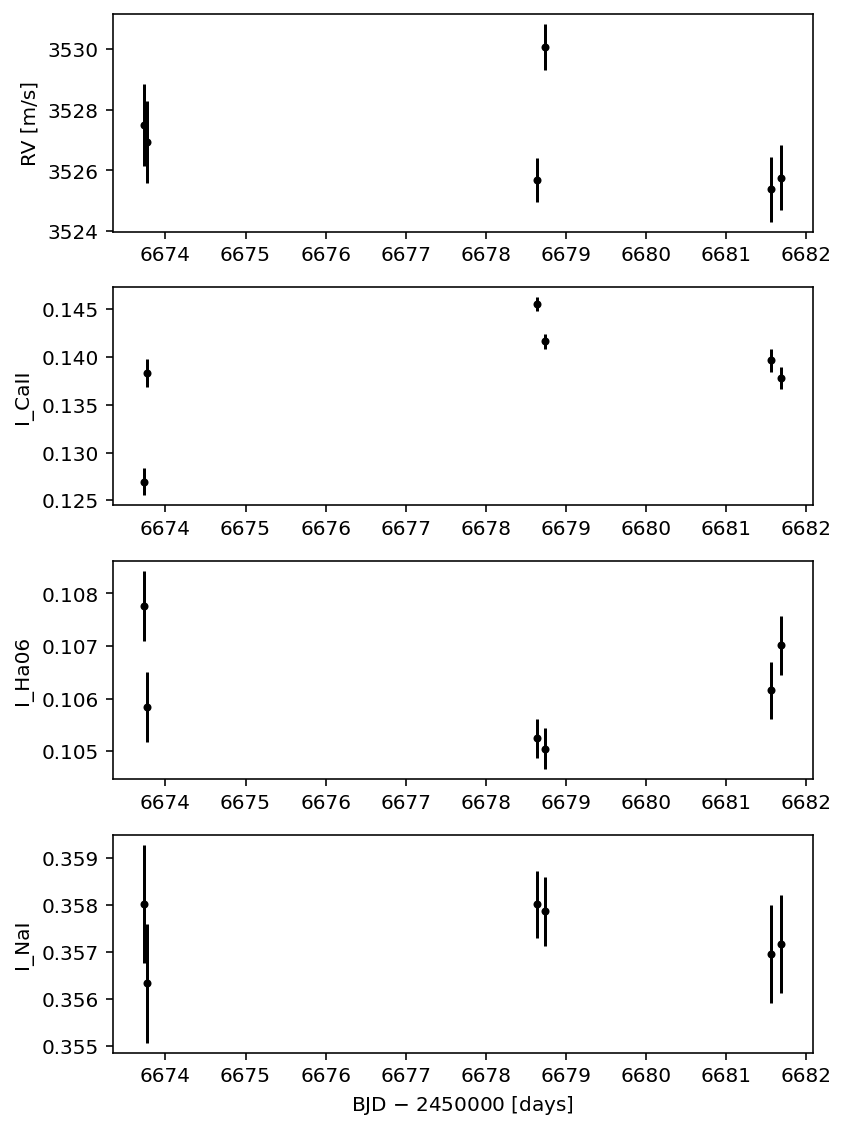

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pylab as plt

plt.figure(figsize=(6, (len(indices)+1)*2))

plt.subplot(len(indices)+1, 1, 1)
plt.ylabel("RV [m/s]")
plt.errorbar(df.bjd - 2450000, df.rv, df.rv_err, fmt='k.')



for i, index in enumerate(indices):
    plt.subplot(len(indices)+1, 1, i+2)
    plt.ylabel(index)
    plt.errorbar(df.bjd - 2450000, df[index], df[index + "_err"], fmt='k.')
plt.xlabel("BJD $-$ 2450000 [days]")
plt.tight_layout()
